# Solving Non-linear Equations

The [Roots](https://github.com/JuliaMath/Roots.jl) package provides methods for solving a non-linear equation (one variable, one function). 

For a system of non-linear equations, use [NLsolve](https://github.com/JuliaNLSolvers/NLsolve.jl).

# Load Packages

In [1]:
using Dates, Roots, NLsolve
           
include("printmat.jl")   

printyellow (generic function with 1 method)

In [2]:
using Plots

#pyplot(size=(600,400))    
gr(size=(480,320))
default(fmt = :svg)

# Defining and Plotting the Function

The next few cells define a fairly simple function and then plots it. 

If possible, plot your function. Maybe you see something strange, perhaps that there are several roots? It also helps you set the initial guesses (or brackets) for root solving.

In [3]:
fn1(x,c) = 2*(x - 1.1)^2 - c                    

fn1 (generic function with 1 method)

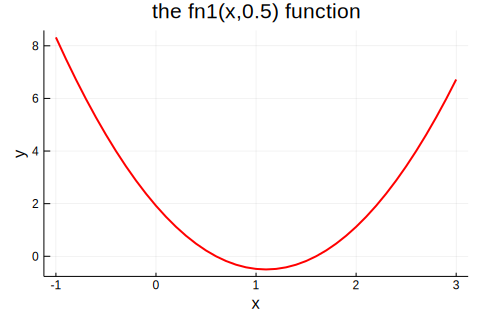

In [4]:
x = -1:0.1:3

p1 = plot(x,fn1.(x,0.5),color=:red,linewidth=2,legend=nothing)
title!("the fn1(x,0.5) function")
xlabel!("x")
ylabel!("y")

There seems to be two roots: around 0.6 and 1.6.

# Solving a Non-Linear Equation

The Roots package wants a function with only one input. An easy way to turn ```fn1(a,0.5)``` into that form is by defining an anonymous function:
```
x->fn1(x,0.5)
```

Then, running 
```
find_zero(x->fn1(x,0.5),(x₀,x₁))
```
searches for a root in the `[x₀,x₁]` interval. Alternatively, you can also do 
```
find_zero(x->fn1(x,0.5),x₂)
``` 
where `x₂` is a single starting guess.

Instead, running
```
find_zeros(x->fn1(x,0.5),x₀,x₁)
```
searches for all roots between x₀ and x₁. (Notice the *s* in `find_zeros`.)

In [5]:
xRoot1 = find_zero(x->fn1(x,0.5),(-1,1))            #searches for roots in [-1,1]
printlnPs("at which x is fn1(x,0.5) = 0? ",xRoot1)

xRoot2 = find_zero(x->fn1(x,0.5),2)              #searches for roots around 2
printlnPs("at which x is fn1(x,0.5) = 0? ",xRoot2)

printblue("\nyes, there are several roots. Just look at it (in the plot)")

at which x is fn1(x,0.5) = 0?      0.600
at which x is fn1(x,0.5) = 0?      1.600

yes, there are several roots. Just look at it (in the plot)


In [6]:
xRootsAll = find_zeros(x->fn1(x,0.5),-1,3)            #find_zeros (notice the "s")
                                                    
printlnPs("at which x is fn1(x,0.5) = 0? ",xRootsAll)       

at which x is fn1(x,0.5) = 0?      0.600     1.600


# Solving a System of Non-Linear Equations

The NLsolve package has many options. The cells below illustrate a very simple case (2 non-linear equations with 2 unknowns, no information about the derivatives).

The two equations are

$ 
y-x^2-1=0
$

$
y-x-1=0
$

and the roots are at $(x,y)=(0,1)$ and also at $(1,2)$.

In [7]:
function fn2(p)             #p is a vector with 2 elemens, the output too
    (x,y) = (p[1],p[2])
    z = [y-x^2-1;y-x-1]     #equal to [0,0]
    return z
end

fn2 (generic function with 1 method)

In [8]:
Sol2a = nlsolve(fn2,[0.0,0.5])
printlnPs("There is a solution at         ",Sol2a.zero)

Sol2b = nlsolve(fn2,[1.0,0.0])  #try again, using another starting guess       
printlnPs("There is a another solution at ",Sol2b.zero)

There is a solution at             -0.000     1.000
There is a another solution at      1.000     2.000
